#Download

In [1]:
!pip install keras_facenet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


##This code is an implementation of face recognition using FaceNet, which is a neural network model for face recognition. The code consists of several functions and a dictionary to store the known faces with their embeddings.

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from keras_facenet import FaceNet

 ## initializes the FaceNet model for face recognition.

In [3]:
model = FaceNet()

##  This function takes an image path as input and returns the face region of the image. The function first loads the image and converts it to RGB color space. It then uses the FaceNet model to extract the bounding box of the face in the image. Finally, it crops the image to the face region and resizes it to a fixed size.

In [4]:
def extract_face(image_path):
    #load the image, convert it to RGB
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    #extract the bounding box which is represented by the top left corner coordinates and the width and height of the box
    detections = model.extract(image, threshold=0.95)
    
    if not detections:
        return None
    
    x1, y1, width, height = detections[0]['box']
    
    # calculate the bottom right coordinates of the box
    x2, y2 = x1 + width, y1 + height
    
    # extract the face from the image and resize it to be (160,160,3) for the facenet
    face = image[y1:y2, x1:x2]
    face = cv2.resize(face, (160, 160))
    
    return face

##  This function creates a dictionary that maps names to 128-dimensional vectors that represent the faces of the people in the database. The function first loads the images of the people in the database and extracts their features using the extract_face() function. It then stores the features in the dictionary, keyed by the person's name.

In [5]:
face_db = {
    # get the encoded 128-dimentional vector for the each person's face
    "Seif": model.embeddings([extract_face('Known/seif_face.jpg')]),
    "Mina": model.embeddings([extract_face('Known/mina_face.jpg')]),
    "Nawar": model.embeddings([extract_face('Known/nawar_face.jpg')]),
    "Yassa": model.embeddings([extract_face('Known/yassa_face.jpg')]),
    "George": model.embeddings([extract_face('Known/george_face.jpg')]),
    "Kim": model.embeddings([extract_face('Known/kim_face.jpg')]),
    "Trump": model.embeddings([extract_face('Known/trump_face.jpeg')])
}

1/1 [==============================] - 0s 65ms/step


## This function takes a face image as input and returns the name of the person in the image. The function first extracts the features of the face using the extract_face() function. It then looks up the features in the face_db dictionary and returns the name of the person with the most similar features.

In [6]:
def recognize_person(face):
    if face is None:
        return None
    
    # get the encoded 128-dimensional vector for the face
    embeddings = model.embeddings([face])
    
    # Initialize "min_dist" to a large value, say 100
    min_dist = 100
    identity = "Unknown"
    
    # Loop over the database dictionary's names and encodings
    for name, db_enc in face_db.items():
        print(f"Comparing to {name}")
        # Compute L2 distance between the target "encoding" and the current db_enc from the database
        dist = np.linalg.norm(embeddings - db_enc)
        print(f"distance = {dist}")
        # If this distance is less than the min_dist, then set min_dist to dist, and identity to name
        if dist < min_dist:
            min_dist = dist
            identity = name
    
    return identity

##  This function takes an image as input and draws a bounding box around each face in the image. The function first converts the image to RGB color space. It then uses the FaceNet model to detect faces in the image. For each face that is detected, the function calls the recognize_person() function to get the name of the person in the image. Finally, the function draws a bounding box around each face in the image and labels the box with the name of the person.

In [7]:
def process_image(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    detections = model.extract(image, threshold=0.95)
    for detection in detections:
        x1, y1, width, height = detection['box']
        x2, y2 = x1 + width, y1 + height
        face = image[y1:y2, x1:x2]
        identity = recognize_person(face)
        
        if identity == "Unknown":
            cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 0), 5)
        else:
            cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 5)
            cv2.putText(image, identity, (x1, y1-10), cv2.FONT_HERSHEY_SIMPLEX, 1.2, (0, 255, 0), 2)
    
    plt.imshow(image)
    plt.axis('off')
    plt.show()


# Test

1/1 [==============================] - 0s 66ms/step
Comparing to Seif
distance = 1.3878144025802612
Comparing to Mina
distance = 1.2056864500045776
Comparing to Nawar
distance = 1.2265914678573608
Comparing to Yassa
distance = 0.8375043869018555
Comparing to George
distance = 1.246120810508728
Comparing to Kim
distance = 1.2120121717453003
Comparing to Trump
distance = 1.5094120502471924


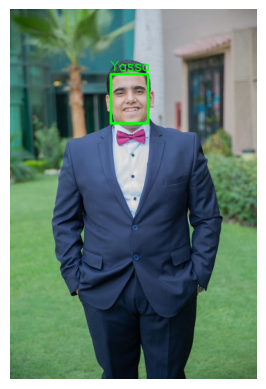

In [8]:
image = cv2.imread("Unknown/yassa.jpg")
process_image(image)

1/1 [==============================] - 0s 69ms/step
Comparing to Seif
distance = 1.3736233711242676
Comparing to Mina
distance = 1.2386934757232666
Comparing to Nawar
distance = 0.5468027591705322
Comparing to Yassa
distance = 1.3994855880737305
Comparing to George
distance = 1.3633077144622803
Comparing to Kim
distance = 1.3958752155303955
Comparing to Trump
distance = 1.5403774976730347


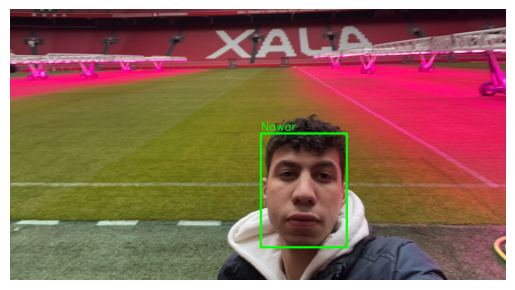

In [9]:
image = cv2.imread("Unknown/nawar.jpg")
process_image(image)

1/1 [==============================] - 0s 66ms/step
Comparing to Seif
distance = 0.5947598814964294
Comparing to Mina
distance = 1.3125158548355103
Comparing to Nawar
distance = 1.2918070554733276
Comparing to Yassa
distance = 1.3508012294769287
Comparing to George
distance = 1.1655133962631226
Comparing to Kim
distance = 1.3968968391418457
Comparing to Trump
distance = 1.4970182180404663


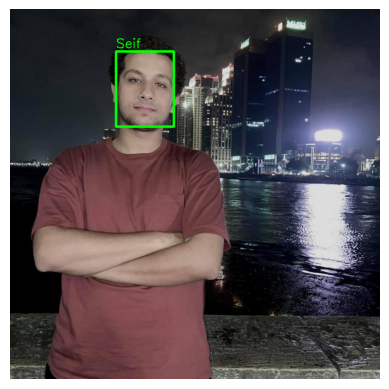

In [10]:
image = cv2.imread("Unknown/seif.jpg")
process_image(image)

1/1 [==============================] - 0s 123ms/step
Comparing to Seif
distance = 1.372961401939392
Comparing to Mina
distance = 1.2656136751174927
Comparing to Nawar
distance = 0.6466810703277588
Comparing to Yassa
distance = 1.288619875907898
Comparing to George
distance = 1.3980982303619385
Comparing to Kim
distance = 1.4736354351043701
Comparing to Trump
distance = 1.4659092426300049


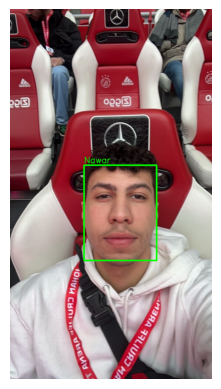

In [11]:
image = cv2.imread("Unknown/nawar2.jpg")
process_image(image)

1/1 [==============================] - 0s 81ms/step
Comparing to Seif
distance = 1.4285224676132202
Comparing to Mina
distance = 0.747952938079834
Comparing to Nawar
distance = 1.1346449851989746
Comparing to Yassa
distance = 1.2128976583480835
Comparing to George
distance = 1.1356300115585327
Comparing to Kim
distance = 1.341846227645874
Comparing to Trump
distance = 1.4266934394836426


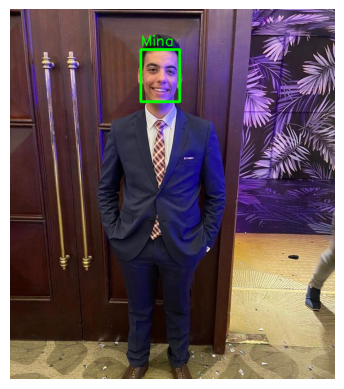

In [12]:
image = cv2.imread("Unknown/mina.jpg")
process_image(image)

1/1 [==============================] - 0s 70ms/step
Comparing to Seif
distance = 1.4105641841888428
Comparing to Mina
distance = 1.4603701829910278
Comparing to Nawar
distance = 1.2904196977615356
Comparing to Yassa
distance = 1.3238481283187866
Comparing to George
distance = 1.3838893175125122
Comparing to Kim
distance = 0.3152298033237457
Comparing to Trump
distance = 1.3397146463394165
1/1 [==============================] - 0s 71ms/step
Comparing to Seif
distance = 1.5178953409194946
Comparing to Mina
distance = 1.3435020446777344
Comparing to Nawar
distance = 1.3422565460205078
Comparing to Yassa
distance = 1.5263904333114624
Comparing to George
distance = 1.3211642503738403
Comparing to Kim
distance = 1.370314359664917
Comparing to Trump
distance = 0.4533134698867798


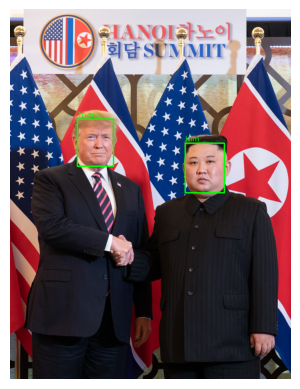

In [13]:
image = cv2.imread("Unknown/Donald and kim.jpg")
process_image(image)

1/1 [==============================] - 0s 73ms/step
Comparing to Seif
distance = 1.4137274026870728
Comparing to Mina
distance = 0.411334753036499
Comparing to Nawar
distance = 1.3031275272369385
Comparing to Yassa
distance = 1.2696304321289062
Comparing to George
distance = 1.0854851007461548
Comparing to Kim
distance = 1.4748820066452026
Comparing to Trump
distance = 1.3095625638961792
1/1 [==============================] - 0s 70ms/step
Comparing to Seif
distance = 0.6379421353340149
Comparing to Mina
distance = 1.261263370513916
Comparing to Nawar
distance = 1.3329424858093262
Comparing to Yassa
distance = 1.3002008199691772
Comparing to George
distance = 1.1646870374679565
Comparing to Kim
distance = 1.4847898483276367
Comparing to Trump
distance = 1.5516752004623413


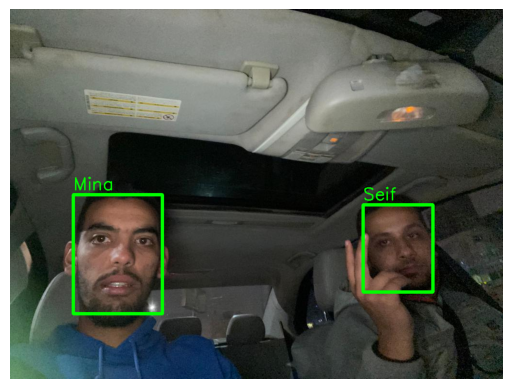

In [14]:
image = cv2.imread("Unknown/seif&mina.jpg")
process_image(image)